Привет!

Не знаю, можете ли вы представить свою жизнь без музыки. Лично я - нет, поэтому сегодня говорим о трендах, которые навсегда останутся в наших плейлистах

Spotify ушел из России, но не из наших сердец... И, к счастью, не из открытых баз данных. Поэтому, чтобы погрузиться в мир музыки, мы будем использовать топ 100 наиболее прослушиваемых синглов spotify.

In [10]:
# Начнем с импорта библиотек, которые нам понадобятся
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from shapely.geometry import Point
import networkx as nx

In [11]:
# Откроем скачанный файл
with open('Top 100 most Streamed - Sheet1.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    df = pd.DataFrame(reader)

# И исследуем формат датасета: выведем названия колонок
df.columns

Index(['title', 'artist', 'top genre', 'year', 'beats.per.minute', 'energy',
       'danceability', 'loudness.dB', 'liveness', 'valance', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [12]:
# Проверим, есть ли пропущенные значения
df.isna().sum()

title               0
artist              0
top genre           0
year                0
beats.per.minute    0
energy              0
danceability        0
loudness.dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64

Отлично, пустых ячеек нет, можем спокойно работать с данными

In [13]:
# Посмотрим, как выглядят наши данные: выведем первые строки и последние
df.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [14]:
df.tail()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56
99,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,dance pop,2016,102,73,67,-7,9,66,198,3,10,53


Проверка пройдена, теперь можем приступать к нашему исследованию.
Давайте посмотрим, кто из артистов больше всего постарался и выпустил наибольшее количество часто прослушиваемых песен

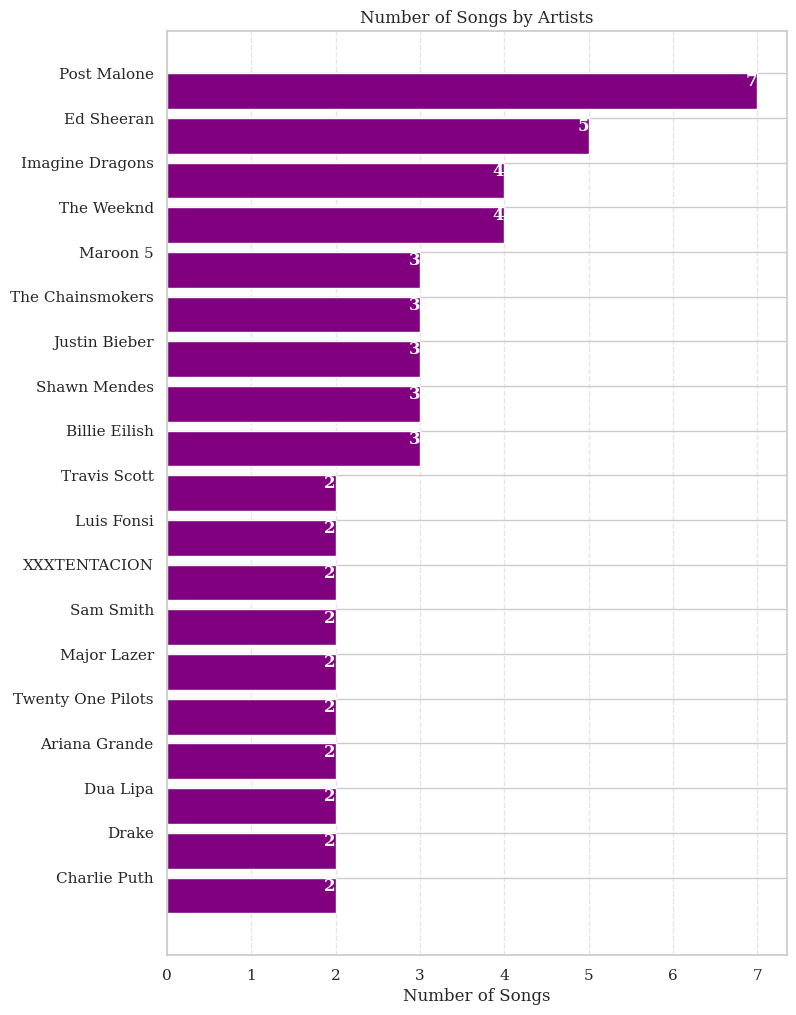

In [15]:
# Выберем параметры текста
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Сгруппируем данные так, чтобы узнать, сколько песен выпустил каждый исполнитель
grouped = df.groupby('artist').size()

# Создадим новый датафрейм
plot_data = pd.DataFrame({'artist': grouped.index, 'count': grouped.values})

# Отсортируем исполнителей по убыванию количества песен
plot_data = plot_data.sort_values('count', ascending=False)

# Будем смотреть только на исполнителей, у которых больше 1 песни в топе
filtered_data = plot_data[plot_data['count'] > 1]

# Создадим новый DataFrame, чтобы связать исполнителя с песнями
artists = df.groupby('artist')['title'].agg(lambda x: x.iloc[0])

# Добавим информацию об исполнителе на наш график
filtered_data = filtered_data.set_index('artist').join(artists)

# Построим график, ура
plt.figure(figsize=(8,12))
barplot = plt.barh(filtered_data.index, filtered_data['count'], align='edge', height=0.8, color='purple')

# Добавим названия осям
plt.xlabel('Number of Songs')
plt.title('Number of Songs by Artists')

# Вывернем график, чтобы видеть топ исполнителей с начала, а не с конца))
plt.gca().invert_yaxis()

# Добавим сеточку на график
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# И добавим количество песен на наши столбцы
for i, count in enumerate(filtered_data['count']):
    plt.text(count, i, str(count), va='top', ha='right', color='white', weight='bold')

plt.show()

В целом вы и сами все видите: Post Malone, Ed Sheeran, The Weekend и Imagine Dragons взорвали чарты так, что ни одна их песня крутится из всех колонок, а несколько

В наших данных очень много параметров, давайте попробуем выяснить, есть ли в них какие-то закономерности. В этом деле нам поможет тепловая карта

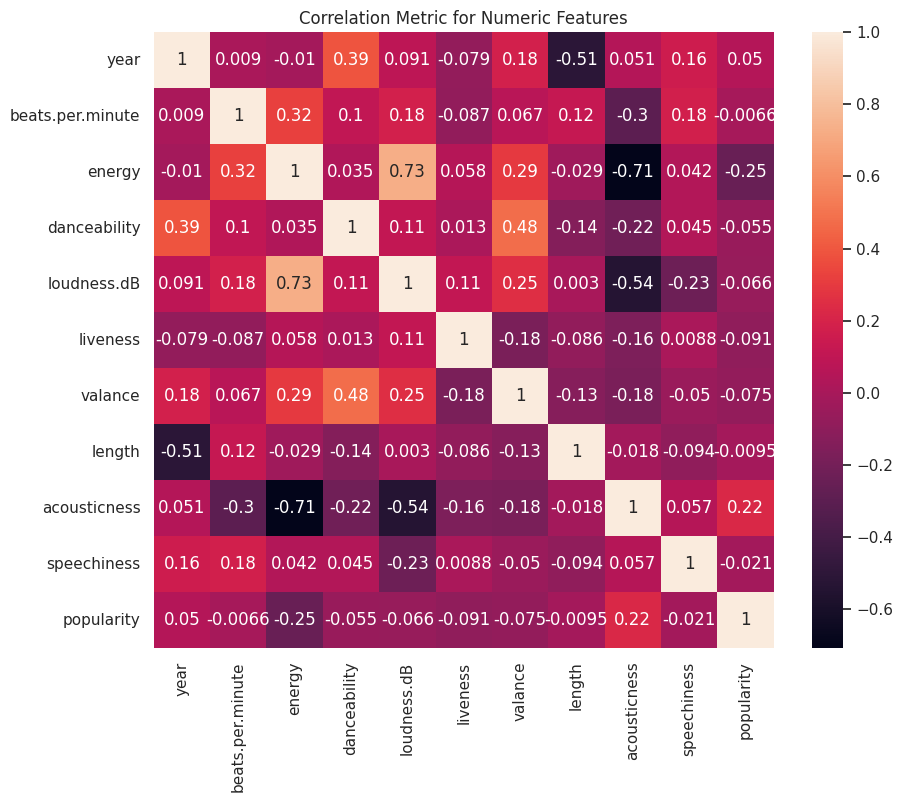

In [16]:
# Сделаем новый датасет, оставив только численные параметры
songs = df.iloc[:, 3:]
correlation_matrix = songs.corr(method='pearson')

# Создадим тепловую карту
plt.figure(figsize=(10, 8))

# Установим красивую тему
sns.set_theme(palette='coolwarm')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.show()

Кажется, про какие-то четкие зависимости мы говорить не можем, но

Наиболее позитивно коррелируемые параметры - enegry and loudness, что звучит логичным: чем громче музыка, тем сильнее под нее хочется танцевать

Наиболее отрицательно зависимые параметры - energy and acoustickness, что тоже разумно: акустика что-то более атмосферное и спокойное, противололожное энергичности

Теперь посмотрим на биты в песнях: какое распределение они имеют на наших данных

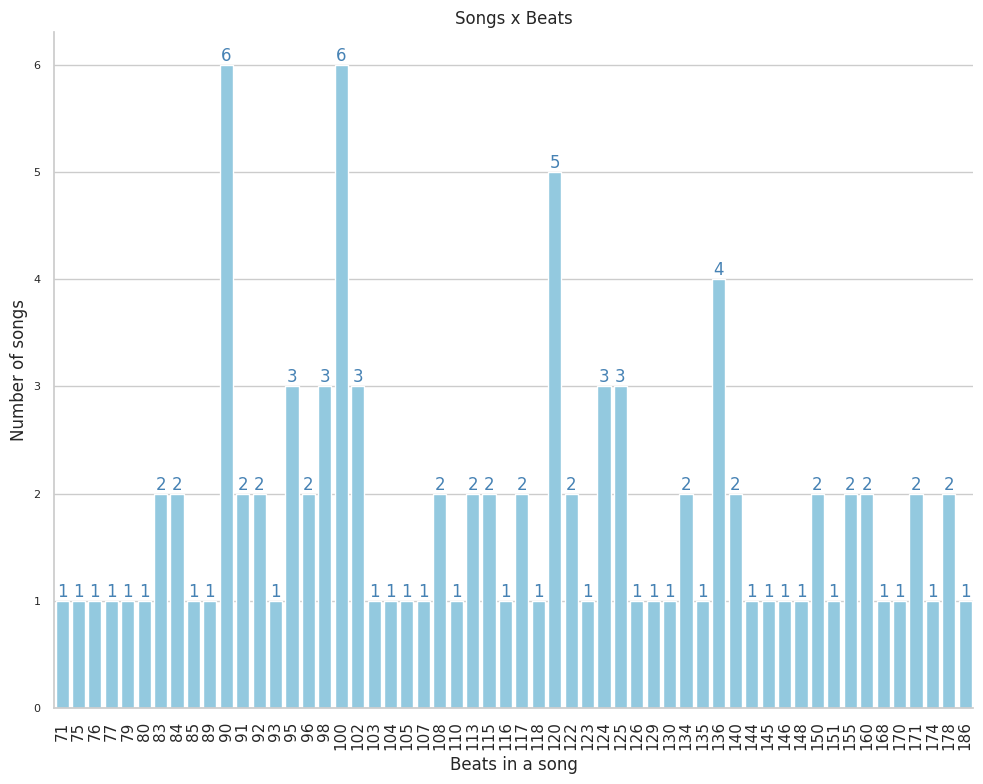

In [17]:
# Переведем данные нужного нам столбца в целочисленный тип
df['beats.per.minute'] = df['beats.per.minute'].astype(int)

# Посчитаем количество песен для каждого значения битов
grouped_df = df.groupby('beats.per.minute').size()

# Зададим параметры для графика
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Зададим оси
ax = sns.barplot(x=grouped_df.index, y=grouped_df.values, color='skyblue')

# Добавим надписи
plt.xlabel('Beats in a song')
plt.ylabel('Number of songs')
plt.title('Songs x Beats')

# Повернем название вдоль оси
plt.xticks(rotation=90)

# Выберем размер шрифта
plt.yticks(fontsize=8)

# Проверим, что размеры совпадают
plt.tight_layout()

# Добавим количество песен на график
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, color='steelblue')

# Уберем пограничные значения
sns.despine()

plt.show()

Пиковые значения достигаются при 90 и 100: песня с большей вероятностью попадет в топ, если не переусердствовать с битами)))


Давайте посмотрим на длительность песен. Может есть какой-то секрет у песен, пользующихся большой популярностью.

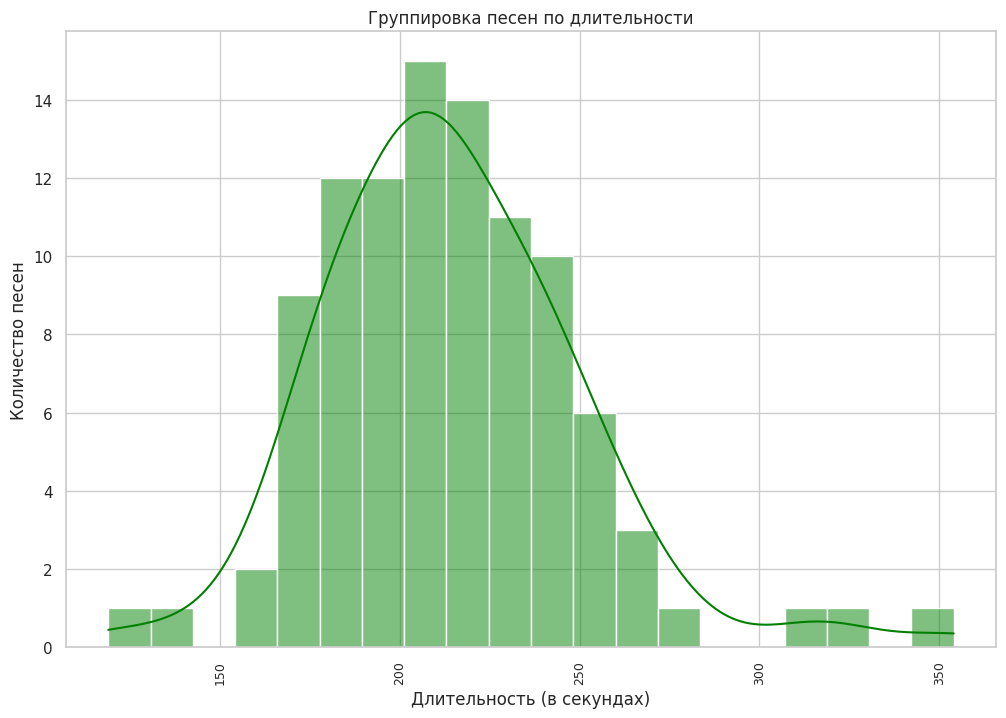

In [18]:
# Переведем данные нужного нам столбца в целочисленный тип
df['length'] = df['length'].astype(int)

# Создим график с помощью библиотеки matplotlib
plt.figure(figsize=(12, 8))

# Сортируем данные по столбцу 'length' в порядке возрастания
sort_len = df.sort_values(by=['length'])

# Создаем гистограмму с помощью библиотеки seaborn
sns.histplot(data=sort_len, x='length', bins=20, kde=True, color='green')

# Добавляем все подписи
plt.xlabel('Длительность (в секундах)')
plt.ylabel('Количество песен')
plt.title('Группировка песен по длительности')

# Поворачиваем, что все было красиво
plt.xticks(rotation=90)
plt.xticks(fontsize=9)

plt.show()

Вау, мы видим нормальное распредение длины песни: медиана находится в промежутке 200-210 секунд == 3.3-3.5 минут. Вот мы и нашли оптимальную длину для песни))

Не уверена, что секрет успеха песни именно в этом, но есть над чем задуматься

Давайте построим еще один график, базирующийся на длине песни: выведем все песни на одну поверхность, где нахождение точки будет определяться длительностью песни

А еще пометим на нем, где находятся 5 самых популярных песен

In [19]:
# Создаем SQLite базу данных
engine = create_engine('sqlite:///top_spotify_songs.sqlite')

# Записываем данные из pandas DataFrame в SQLite таблицу
df.to_sql('top_songs', engine, if_exists='replace')

%load_ext sql
%sql sqlite:///top_spotify_songs.sqlite

In [20]:
%%sql
SELECT title,	artist, popularity
FROM top_songs
ORDER BY popularity DESC
LIMIT 5;

 * sqlite:///top_spotify_songs.sqlite
Done.


title,artist,popularity
Blinding Lights,The Weeknd,91
Watermelon Sugar,Harry Styles,88
Mood (feat. iann dior),24kGoldn,88
Someone You Loved,Lewis Capaldi,86
Perfect,Ed Sheeran,86


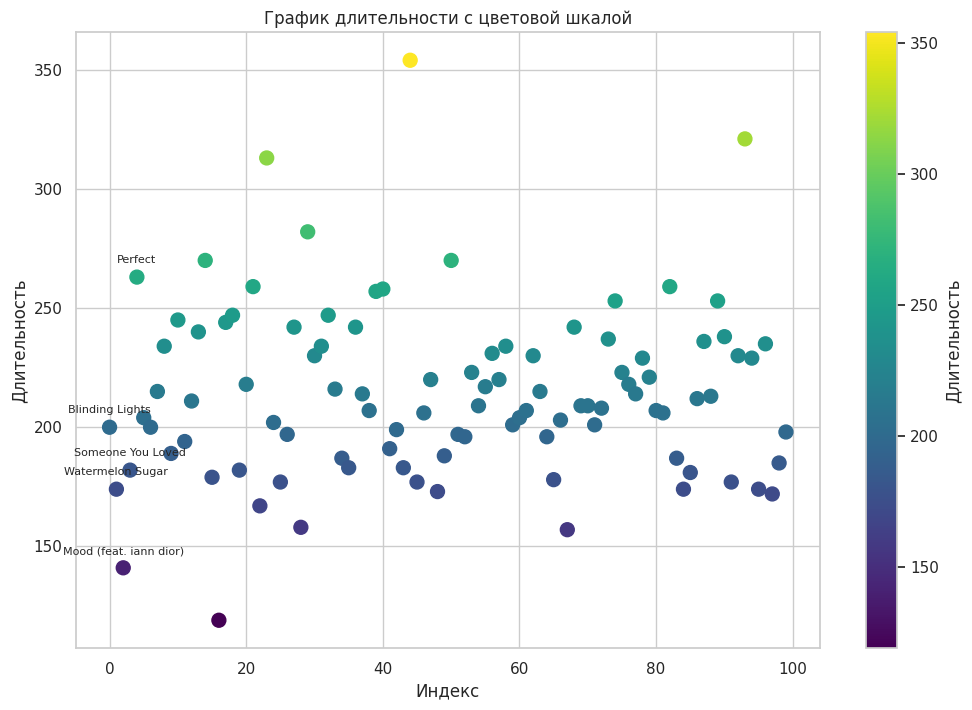

In [21]:
# Создаем график
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Создаем scatter plot
scatter = plt.scatter(df.index, df['length'], c=df['length'], cmap='viridis', s=100)

# Добавим цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Длительность')

# Добавим подписи
plt.xlabel('Индекс')
plt.ylabel('Длительность')
plt.title('График длительности с цветовой шкалой')

# Сделаем пометки для 5 самых популярных песен
df_sorted = df.sort_values(by='popularity', ascending=False)
top_5 = df_sorted.head(5)
for i, row in top_5.iterrows():
    plt.annotate(f"{row['title']}", (row.name, row['length']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.show()

Видим, что точки плотнее расположены между 150 и 250. А также 3 из 5 самых популярных песен близки по длительности к медиане

    year    valance
0   1975  22.000000
1   1995  47.000000
2   2004  24.000000
3   2008  72.000000
4   2012  50.666667
5   2013  41.750000
6   2014  33.000000
7   2015  53.615385
8   2016  50.312500
9   2017  52.833333
10  2018  43.600000
11  2019  59.312500
12  2020  50.333333
13  2021  69.000000


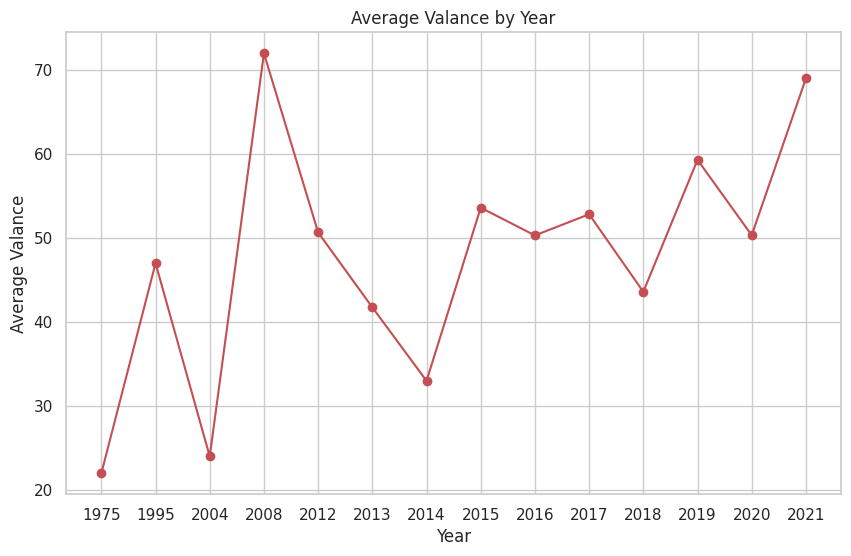

In [22]:
# Проверим и преобразуем данные к числовому типу
grouped_df = df
grouped_df['valance'] = pd.to_numeric(grouped_df['valance'], errors='coerce')

# Удалим строки с некорректными значениями
grouped_df = grouped_df.dropna(subset=['valance'])
grouped_df = grouped_df.groupby('year')['valance'].mean().reset_index()
print(grouped_df)

# Построим график среднего значения valance по годам
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['year'], grouped_df['valance'], marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Average Valance')
plt.title('Average Valance by Year')
plt.grid(True)
plt.show()

Интересно, что мера позитививности в песнях показывает положительный тренд: будем верить, что люди становятся счастливее, поэтому хотят подкреплять свое настроение подходящей музыкой

Теперь достанем данные об исполнителях с самыми продаваемыми песнями и альбомами. Для этого найдем данные на википедии и с помощью парсинга создадим новый датафрейм

In [23]:
# URL страницы с данными
url_artists = "https://en.wikipedia.org/wiki/List_of_best-selling_music_artists"

# Получим HTML-кода страницы
response = requests.get(url_artists)
soup = BeautifulSoup(response.text, 'html.parser')

# Найдем таблицы на странице
tables = soup.find_all('table', {'class': 'wikitable'})

# Предполагается, что нужная таблица первая на странице
df_artists_0 = pd.read_html(str(tables))[0]
df_artists_1 = pd.read_html(str(tables))[1]
df_artists_2 = pd.read_html(str(tables))[2]
df_artists_3 = pd.read_html(str(tables))[3]
df_artists_4 = pd.read_html(str(tables))[4]
df_artists_5 = pd.read_html(str(tables))[5]

df1 = pd.concat([df_artists_0, df_artists_1, df_artists_2, df_artists_3, df_artists_4, df_artists_5], axis=0)

df1

,Artist,Country,Period active,Release-year of first charted record,Genre,Total certified units (from available markets)[b],Claimed sales
0,The Beatles,United Kingdom,1960–1970[11],1962[11],Rock / pop[11],.mw-parser-output .hidden-begin{box-sizing:bor...,600 million[43][44] 500 million[45][46]
1,Michael Jackson,United States,1964–2009[47],1971[47],Pop / rock / dance / soul / R&B[47],289.5 million US: 177.3 million[12] JPN: 4.650...,500 million[45] 400 million[64]
2,Elvis Presley,United States,1953–1977[65],1956[65],Rock and roll / pop / country[65],234.7 million US: 199.650 million[12] JPN: 300...,500 million[71]
3,Elton John,United Kingdom,1962–present[72],1970[72],Pop / rock[72],214.3 million US: 139.050 million[12] JPN: 1.1...,300 million[76][77] 250 million[78][79]
4,Queen,United Kingdom,1971–present[80],1973[80],Rock[80],188 million US: 97.7 million[12] JPN: 3.8 mill...,300 million[83][84] 250 million[85]
...,...,...,...,...,...,...,...
13,Bob Marley,Jamaica,1962–1981[430],1975[430],Reggae[430],"47.5 million US: 21.850 million[12] JPN: 200,0...",75 million[433]
14,The Police,United Kingdom,1977–1986 2007–2008[434],1978[434],Pop / rock[434],"42.6 million US: 23.650 million[12] JPN: 100,0...",75 million[437]
15,Barry Manilow,United States,1973–present[438],1973[438],Pop / soft rock[438],36.7 million US: 33.3 million[12] UK: 3.225 mi...,75 million[439]
16,Kiss,United States,1972–present[440],1974[440],Hard rock / heavy metal[440],"28.7 million US: 26 million[12] JPN: 100,000[b...",75 million[441]


Вероятно, данных будет не хватать, но давайте проверим в конце

Для будущего графика нам нужны страны и их расположения на карте, поэтому найдем эти данные и добавим все в один датафрейм

In [24]:
# Определяем URL для данных стран
url_countries = "https://gist.github.com/tadast/8827699"

# Отправляем GET-запрос по URL
response = requests.get(url_countries)

# Парсим HTML-контент с помощью BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Находим все элементы таблицы в HTML и преобразуем в датафрейм
tables = soup.find_all('table')
df2 = pd.read_html(str(tables))[0]

# Объединяем df1 с df2 на основе столбца 'Country'
merge = df1.merge(df2[['Country', 'Latitude (average)',	'Longitude (average)']], on='Country', how = 'left')
merge

,Artist,Country,Period active,Release-year of first charted record,Genre,Total certified units (from available markets)[b],Claimed sales,Latitude (average),Longitude (average)
0,The Beatles,United Kingdom,1960–1970[11],1962[11],Rock / pop[11],.mw-parser-output .hidden-begin{box-sizing:bor...,600 million[43][44] 500 million[45][46],54.00,-2.0
1,Michael Jackson,United States,1964–2009[47],1971[47],Pop / rock / dance / soul / R&B[47],289.5 million US: 177.3 million[12] JPN: 4.650...,500 million[45] 400 million[64],38.00,-97.0
2,Elvis Presley,United States,1953–1977[65],1956[65],Rock and roll / pop / country[65],234.7 million US: 199.650 million[12] JPN: 300...,500 million[71],38.00,-97.0
3,Elton John,United Kingdom,1962–present[72],1970[72],Pop / rock[72],214.3 million US: 139.050 million[12] JPN: 1.1...,300 million[76][77] 250 million[78][79],54.00,-2.0
4,Queen,United Kingdom,1971–present[80],1973[80],Rock[80],188 million US: 97.7 million[12] JPN: 3.8 mill...,300 million[83][84] 250 million[85],54.00,-2.0
...,...,...,...,...,...,...,...,...,...
116,Bob Marley,Jamaica,1962–1981[430],1975[430],Reggae[430],"47.5 million US: 21.850 million[12] JPN: 200,0...",75 million[433],18.25,-77.5
117,The Police,United Kingdom,1977–1986 2007–2008[434],1978[434],Pop / rock[434],"42.6 million US: 23.650 million[12] JPN: 100,0...",75 million[437],54.00,-2.0
118,Barry Manilow,United States,1973–present[438],1973[438],Pop / soft rock[438],36.7 million US: 33.3 million[12] UK: 3.225 mi...,75 million[439],38.00,-97.0
119,Kiss,United States,1972–present[440],1974[440],Hard rock / heavy metal[440],"28.7 million US: 26 million[12] JPN: 100,000[b...",75 million[441],38.00,-97.0


Соединим все-все данные в одном датафрейме

In [25]:
# Изменим название столбца в изначальном датафрейме
df.rename(columns = {'artist':'Artist'}, inplace = True )

# Соединяем датафреймы
merged_df = df.merge(merge[['Artist', 'Country', 'Latitude (average)',	'Longitude (average)']], on='Artist', how='left')

merged_df

,title,Artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,Country,Latitude (average),Longitude (average)
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91,Canada,60.0,-95.0
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,NaN,NaN,NaN
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,NaN,NaN,NaN
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,NaN,NaN,NaN
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,United Kingdom,54.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66,Canada,60.0,-95.0
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66,United States,38.0,-97.0
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66,NaN,NaN,NaN
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56,NaN,NaN,NaN


In [26]:
# Проверим, сколько пропущенных значений
merged_df.isna().sum()

title                   0
Artist                  0
top genre               0
year                    0
beats.per.minute        0
energy                  0
danceability            0
loudness.dB             0
liveness                0
valance                 0
length                  0
acousticness            0
speechiness             0
popularity              0
Country                65
Latitude (average)     65
Longitude (average)    65
dtype: int64

Действительно, данных недостаточно. Найдем еще базу данных, где есть остальные артисты со странами

In [28]:
# Откроем скачанный файл
with open('Top_Charts_Artists_Country.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    df3 = pd.DataFrame(reader)

# Сделаем из одного столбца два нормальных
df3[['Artist', 'Country']] = df3['Artist;Country'].str.split(';', n=1, expand=True)

df3.head()

,Artist;Country,Artist,Country
0,Miley Cyrus;United States,Miley Cyrus,United States
1,FIFTY FIFTY;United Kingdom,FIFTY FIFTY,United Kingdom
2,ROSALÍA;Spain,ROSALÍA,Spain
3,PinkPantheress;United Kingdom,PinkPantheress,United Kingdom
4,Metro Boomin;United States,Metro Boomin,United States


In [29]:
# Снова соединяем датафреймы
merge2 = df3.merge(df2[['Country', 'Latitude (average)',	'Longitude (average)']], on='Country', how = 'left')
merge2

,Artist;Country,Artist,Country,Latitude (average),Longitude (average)
0,Miley Cyrus;United States,Miley Cyrus,United States,38.0,-97.00
1,FIFTY FIFTY;United Kingdom,FIFTY FIFTY,United Kingdom,54.0,-2.00
2,ROSALÍA;Spain,ROSALÍA,Spain,40.0,-4.00
3,PinkPantheress;United Kingdom,PinkPantheress,United Kingdom,54.0,-2.00
4,Metro Boomin;United States,Metro Boomin,United States,38.0,-97.00
...,...,...,...,...,...
960,Meck;United Kingdom,Meck,United Kingdom,54.0,-2.00
961,Matt Simons;United States,Matt Simons,United States,38.0,-97.00
962,Hoodie Forester;Netherlands,Hoodie Forester,Netherlands,52.5,5.75
963,NSB;United States,NSB,United States,38.0,-97.00


In [30]:
# Снова изменим название столбца в изначальном датафрейме
df.rename(columns = {'artist':'Artist'}, inplace = True )

# И снова соединяем датафреймы
merged_df = df.merge(merge2[['Artist', 'Country', 'Latitude (average)',	'Longitude (average)']], on='Artist', how='left')

merged_df

,title,Artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,Country,Latitude (average),Longitude (average)
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91,Canada,60.00,-95.0
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,United Kingdom,54.00,-2.0
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,United States,38.00,-97.0
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,United Kingdom,54.00,-2.0
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,United Kingdom,54.00,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66,Canada,60.00,-95.0
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66,United States,38.00,-97.0
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66,NaN,NaN,NaN
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56,Jamaica,18.25,-77.5


In [31]:
# Снова проверим, сколько пропущенных значений
merged_df.isna().sum()

title                  0
Artist                 0
top genre              0
year                   0
beats.per.minute       0
energy                 0
danceability           0
loudness.dB            0
liveness               0
valance                0
length                 0
acousticness           0
speechiness            0
popularity             0
Country                2
Latitude (average)     2
Longitude (average)    2
dtype: int64

Отлично, так гораздо лучше. С этим можно работать

<ipython-input-33-84c5f94b632e>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


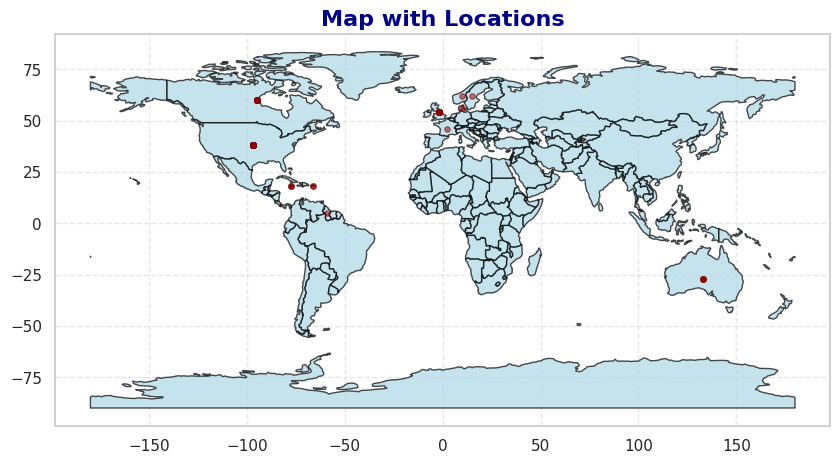

In [33]:
# Уберем пустые ячейки
merged_df = merged_df.dropna(subset=['Latitude (average)', 'Longitude (average)'])

# Создаем точки из координат
geometry = [Point(xy) for xy in zip(merged_df['Longitude (average)'], merged_df['Latitude (average)'])]
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Задаем систему координат
gdf.set_crs(epsg=4326, inplace=True)

# Строим карту
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='lightblue', edgecolor='black', figsize=(10, 8), alpha=0.7)

# Добавляем точки
gdf.plot(ax=base, marker='o', color='darkred', markersize=15, alpha=0.5)

# Добавим название
plt.title('Map with Locations', fontsize=16, fontweight='bold', color='darkblue')

# Добавим сетку
plt.grid(True, which='both', linestyle='--', alpha=0.5, color='lightgray')

plt.show()

Можем заметить жирные точки в Америке, бледные в Европе и ни одной в России))

Не зря же мы скачивали данные с Википедии. Давайте проверим, насколько совпадает наш график по странам с графиком, построенным на данных Википедии, при условии, что наш график показывает песни, а график с Википедии - артистов.


<ipython-input-34-d3093927bcc9>:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


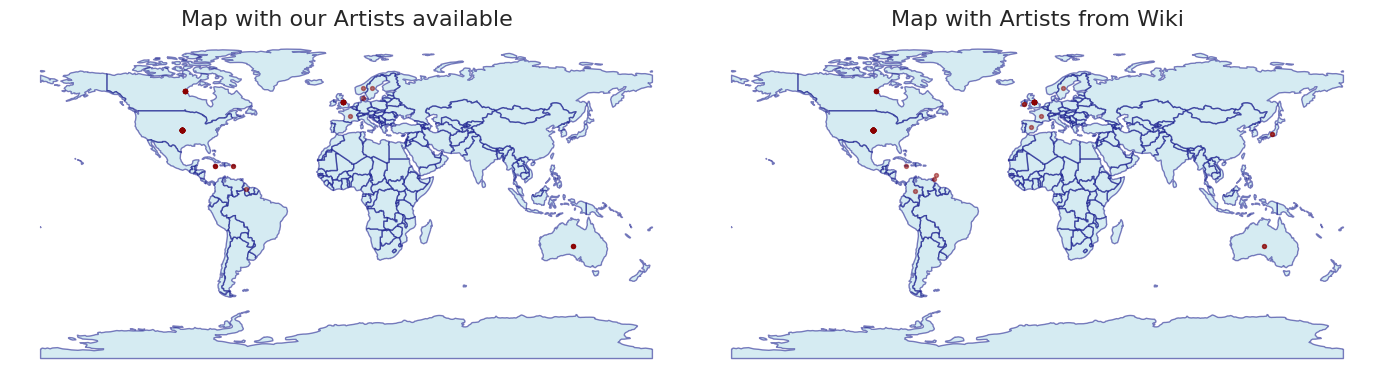

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Уберем пустные ячейки
merged_df = merged_df.dropna(subset=['Latitude (average)', 'Longitude (average)'])
merge = merge.dropna(subset=['Latitude (average)', 'Longitude (average)'])

# Создаем колонки
geometry1 = [Point(xy) for xy in zip(merged_df['Longitude (average)'], merged_df['Latitude (average)'])]
geometry2 = [Point(xy) for xy in zip(merge['Longitude (average)'], merge['Latitude (average)'])]

# Создаем подходящий датафрейм
gdf1 = gpd.GeoDataFrame(merged_df, geometry=geometry1)
gdf2 = gpd.GeoDataFrame(merge, geometry=geometry2)

# Задаем систему координат
gdf1.set_crs(epsg=4326, inplace=True)
gdf2.set_crs(epsg=4326, inplace=True)

# Создаем подплоты
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), width_ratios=[1, 1])

# Задаем карту для каждого
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Работаем с левой частью
base1 = world.plot(ax=ax1, color='lightblue', edgecolor='navy', alpha=0.5)
gdf1.plot(ax=base1, marker='o', color='darkred', markersize=8, alpha=0.5)
ax1.set_title('Map with our Artists available', fontsize=16)
ax1.set_axis_off()

# С правой частью
base2 = world.plot(ax=ax2, color='lightblue', edgecolor='navy', alpha=0.5)
gdf2.plot(ax=base2, marker='o', color='darkred', markersize=8, alpha=0.5)
ax2.set_title('Map with Artists from Wiki', fontsize=16)
ax2.set_axis_off()

# Проверяем, что размер один
plt.tight_layout()

# Задаем размеры
fig.set_size_inches(14, 6)

plt.show()

Графики очень похожи, но на правом точек, кажется, больше. Давайте еще проверим, сколько песен было выпущено в каждой стране и сколько артистов, находятся в каждой стране (проверим данные, которые показаны на графике)

In [35]:
merged_df

,title,Artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,Country,Latitude (average),Longitude (average)
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91,Canada,60.00,-95.0
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,United Kingdom,54.00,-2.0
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,United States,38.00,-97.0
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,United Kingdom,54.00,-2.0
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,United Kingdom,54.00,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Without Me (with Juice WRLD),Halsey,dance pop,2019,136,51,74,-6,18,45,229,36,7,67,United States,38.00,-97.0
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66,Canada,60.00,-95.0
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66,United States,38.00,-97.0
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56,Jamaica,18.25,-77.5


In [36]:
# Делали подобное выше
engine = create_engine('sqlite:///topmusic_countries.sqlite')

merged_df.to_sql('music', engine, if_exists='replace')

98

In [37]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [38]:
%sql sqlite:///topmusic_countries.sqlite

In [39]:
%%sql
SELECT Country, COUNT(*) as music_count
FROM music
GROUP BY Country;

   sqlite:///top_spotify_songs.sqlite
 * sqlite:///topmusic_countries.sqlite
Done.


Country,music_count
Australia,4
Canada,12
Denmark,1
France,1
Guyana,1
Jamaica,3
Norway,1
Puerto Rico,2
Sweden,1
United Kingdom,17


Это количество песен из наших данных. Теперь посмотрим, что какие цифры в Википедии

In [40]:
# См комментарии выше
engine = create_engine('sqlite:///wikimusic_countries.sqlite')

merge.to_sql('wikimusic', engine, if_exists='replace')

118

In [41]:
%sql sqlite:///wikimusic_countries.sqlite

In [42]:
%%sql
SELECT Country, COUNT(*) as music_count
FROM wikimusic
GROUP BY Country;

   sqlite:///top_spotify_songs.sqlite
   sqlite:///topmusic_countries.sqlite
 * sqlite:///wikimusic_countries.sqlite
Done.


Country,music_count
Australia,2
Barbados,1
Canada,6
Colombia,1
France,1
Ireland,2
Jamaica,1
Japan,2
Spain,1
Sweden,1


Все верно, нам не показалось, что на втором графике больше данных. Их действительно больше.

**Итоги**

Давайте сделаем короткое саммари, что нам удалось узнать из нашего небольшого исследования.

1. Артисты, которые выпустили больше всего наиболее прослушиваемых хитов, Post Malone, Ed Sheeran, The Weekend and Imagine Dragons. Все мы их знаем, все мы их слышали.

2. Лайфхаки для тех, кто хочет, чтобы их треки залетали в чарты: создавать песни длиной около 200 секунд, не переусердствовать с битами, ну а еще можно жить в Америке (там вы точно найдете талантливых людей, которые подскажут, как сделать те самые треки)

3. Музыкальные характеристики мало связаны друг с другом, но популярность песен наиболее пропорциональна акустике (еще один совет в пункт выше). Энергичность прямо коррелирует с громкостью и изменяется в обратном направлении относительно акустики

4. Больше всего гениальных артистов живет в Америке, мы это проверили дважды, ну и наибольшее количество песен было создано там же

5. Ну и наша потребность в музыке, вызывающей позитивные эмоции, начала расти в последние годы

Надеюсь, это желание и потребность будет продолжать показывать рост, чтобы люди вокруг заряжались позитивом и ходили с улыбками. А еще надеюсь, что песни, которые вы увидели тут, напомнили вам о хороших временах и заставили взять в руки телефон и включить их на фоне

А если нет, то сейчас самое время. Ведь на этой ноте мой проект подходит к концу. Спасибо, что дочитали <3
